Note: you may need to restart the kernel to use updated packages.
First row c: [ 2 -1  0  1  0  0 -1  0]
Eigenvalues: [1.      +0.j 0.585786-1.j 3.      +2.j 3.414214+1.j 1.      +0.j
 3.414214-1.j 3.      -2.j 0.585786+1.j]


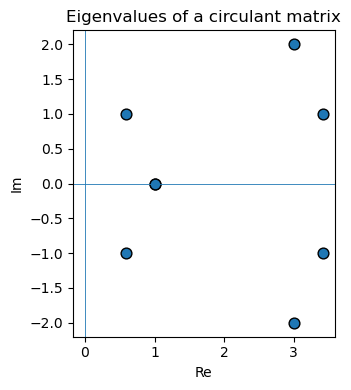

In [1]:
%pip install numpy matplotlib

import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt

def circulant_from_first_row(c):
    """Return the circulant matrix with first row c."""
    c = np.asarray(c)
    n = c.size
    idx = (np.arange(n)[None, :] - np.arange(n)[:, None]) % n
    return c[idx]

def circulant_eigvals_from_dft(c):
    """Eigenvalues of circ(c) via DFT (fast & exact up to FP error)."""
    return fft(np.asarray(c))

# --- demo ---
n = 8
c = np.array([2, -1, 0, 1, 0, 0, -1, 0])  # your first row
C = circulant_from_first_row(c)
lmbda = circulant_eigvals_from_dft(c)

print("First row c:", c)
print("Eigenvalues:", np.round(lmbda, 6))

# quick plot in the complex plane
plt.figure(figsize=(4,4))
plt.scatter(lmbda.real, lmbda.imag, s=60, edgecolor='k')
plt.axhline(0, lw=0.6); plt.axvline(0, lw=0.6)
plt.gca().set_aspect('equal', 'box')
plt.title("Eigenvalues of a circulant matrix")
plt.xlabel("Re"); plt.ylabel("Im")
plt.tight_layout(); plt.show()


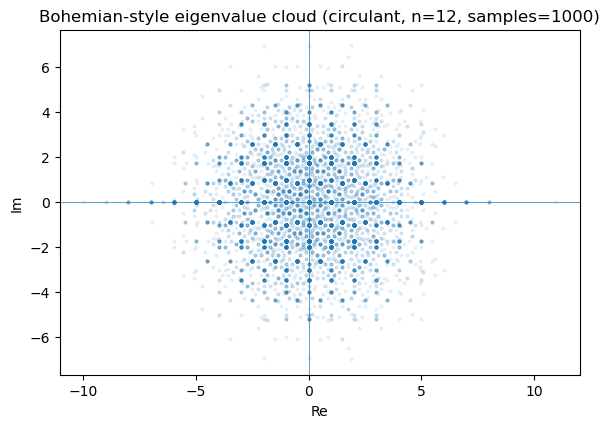

In [2]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt

rng = np.random.default_rng(7)

def random_circulant_first_row(n, values=(-1,0,1), p=None):
    """
    Draw first row entries from a small discrete set.
    p can be probabilities matching `values` (default: uniform).
    """
    vals = np.array(values)
    if p is None:
        p = np.ones(len(vals))/len(vals)
    return rng.choice(vals, size=n, p=p)

def bohemian_gallery_circulants(n=20, samples=4000, values=(-1,0,1), p=None):
    pts = []
    for _ in range(samples):
        c = random_circulant_first_row(n, values=values, p=p)
        eigs = fft(c)               # eigenvalues of circ(c)
        pts.append(eigs)
    return np.concatenate(pts)

# --- gallery demo ---
n = 12
samples = 1000
# tweak `values` or `p` for different looks, e.g. values=(-1,0,1,2) or skewed probs
points = bohemian_gallery_circulants(n=n, samples=samples, values=(-1,0,1))

plt.figure(figsize=(6,6))
plt.scatter(points.real, points.imag, s=4, alpha=0.08)
plt.axhline(0, lw=0.5); plt.axvline(0, lw=0.5)
plt.gca().set_aspect('equal', 'box')
plt.title(f"Bohemian-style eigenvalue cloud (circulant, n={n}, samples={samples})")
plt.xlabel("Re"); plt.ylabel("Im")
plt.tight_layout(); plt.show()


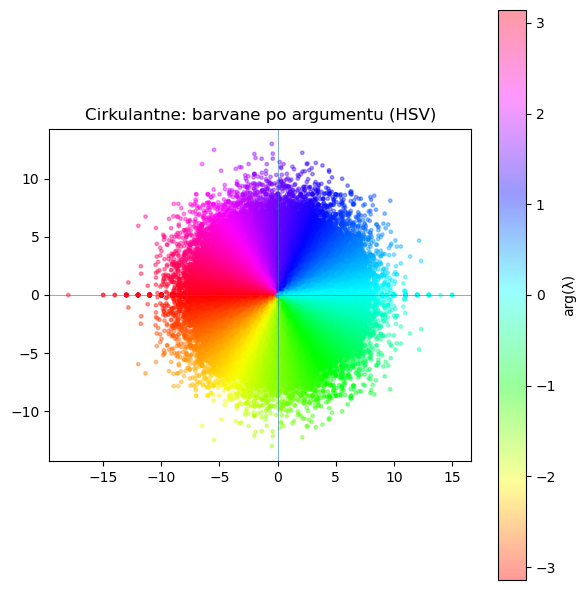

In [3]:
import numpy as np, matplotlib.pyplot as plt
from numpy.fft import fft

def gallery_colored(n=30, samples=3000, values=(-1,0,1)):
    rng = np.random.default_rng(2)
    pts = []
    for _ in range(samples):
        c = rng.choice(values, size=n)
        eig = fft(c)
        pts.append(eig)
    z = np.concatenate(pts)
    ang = np.angle(z)
    plt.figure(figsize=(6,6))
    sc = plt.scatter(z.real, z.imag, s=6, c=ang, cmap="hsv", alpha=0.4)
    plt.axhline(0, lw=0.4); plt.axvline(0, lw=0.4)
    plt.gca().set_aspect('equal', 'box')
    plt.title("Cirkulantne: barvane po argumentu (HSV)")
    plt.colorbar(sc, label="arg(λ)")
    plt.tight_layout(); plt.show()

gallery_colored()


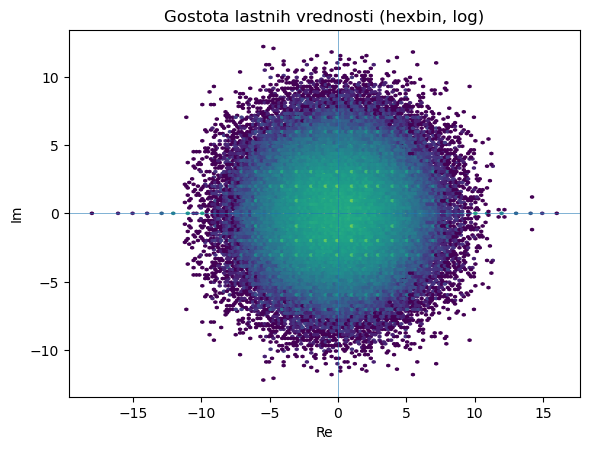

In [4]:
import numpy as np, matplotlib.pyplot as plt
from numpy.fft import fft

def gallery_hexbin(n=28, samples=8000, values=(-1,0,1)):
    rng = np.random.default_rng(3)
    cloud = []
    for _ in range(samples):
        c = rng.choice(values, size=n)
        cloud.append(fft(c))
    z = np.concatenate(cloud)
    plt.figure(figsize=(6,6))
    plt.hexbin(z.real, z.imag, gridsize=160, bins='log')
    plt.axhline(0, lw=0.4); plt.axvline(0, lw=0.4)
    plt.gca().set_aspect('equal', 'box')
    plt.title("Gostota lastnih vrednosti (hexbin, log)")
    plt.xlabel("Re"); plt.ylabel("Im")
    plt.tight_layout(); plt.show()

gallery_hexbin()


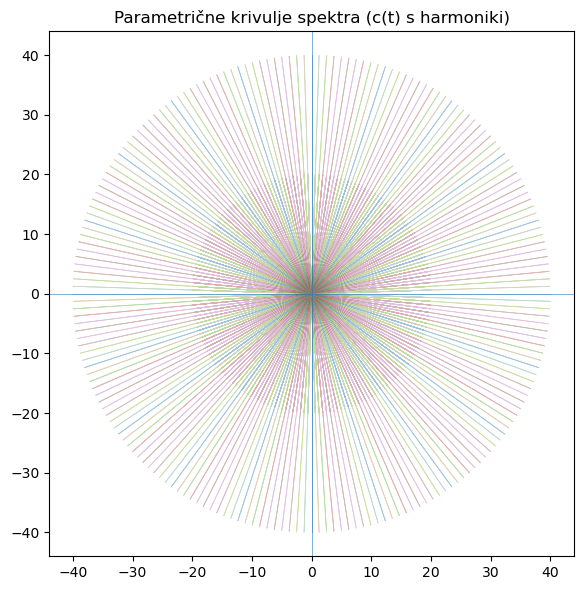

In [5]:
import numpy as np, matplotlib.pyplot as plt
from numpy.fft import fft

def lace_curves(n=40, T=200, k_modes=(1,5,9), amps=(2,1,1)):
    t = np.linspace(0, 2*np.pi, T, endpoint=False)
    plt.figure(figsize=(6,6))
    for tau in t:
        c = np.zeros(n, dtype=float)
        for a,k in zip(amps, k_modes):
            c += a*np.cos(2*np.pi*k*np.arange(n)/n + tau)
        lam = fft(c)
        plt.plot(lam.real, lam.imag, lw=0.6, alpha=0.25)
    plt.axhline(0, lw=0.4); plt.axvline(0, lw=0.4)
    plt.gca().set_aspect('equal', 'box')
    plt.title("Parametrične krivulje spektra (c(t) s harmoniki)")
    plt.tight_layout(); plt.show()

lace_curves()


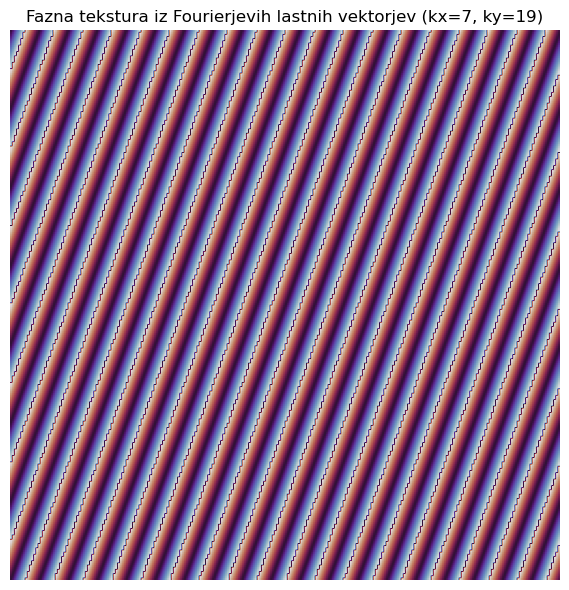

In [6]:
import numpy as np, matplotlib.pyplot as plt

def eigenvector_texture(n=256, kx=7, ky=19):
    x = np.arange(n)
    vx = np.exp(2j*np.pi*kx*x/n)
    vy = np.exp(2j*np.pi*ky*x/n)
    img = np.angle(np.outer(vx, np.conj(vy)))  # fazna razlika
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap="twilight", origin="lower")
    plt.title(f"Fazna tekstura iz Fourierjevih lastnih vektorjev (kx={kx}, ky={ky})")
    plt.axis('off'); plt.tight_layout(); plt.show()

eigenvector_texture()




Lastne vrednosti: [10.+0.j -2.+2.j -2.-2.j -2.+0.j]


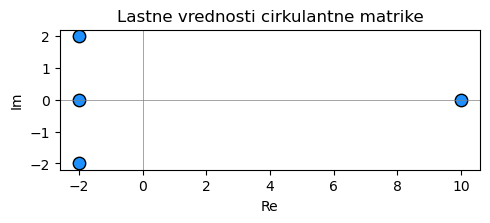

In [7]:
import numpy as np
from scipy.linalg import circulant
import matplotlib.pyplot as plt

# prva vrstica
c = np.array([1, 2, 3, 4])

# cirkulantna matrika
C = circulant(c)

# lastne vrednosti
eigvals = np.linalg.eigvals(C)

# izpis
print("Lastne vrednosti:", np.round(eigvals, 3))

# risanje v kompleksni ravnini
plt.figure(figsize=(5,5))
plt.scatter(eigvals.real, eigvals.imag, color="dodgerblue", s=80, edgecolor="k")
plt.axhline(0, color="gray", lw=0.5)
plt.axvline(0, color="gray", lw=0.5)
plt.gca().set_aspect('equal', 'box')
plt.title("Lastne vrednosti cirkulantne matrike")
plt.xlabel("Re")
plt.ylabel("Im")
plt.tight_layout()
plt.show()


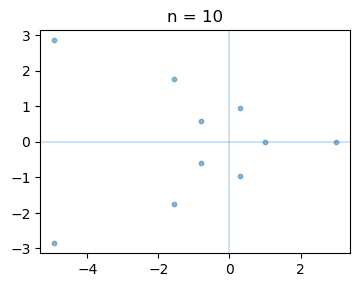

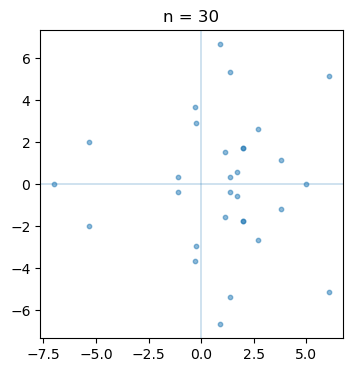

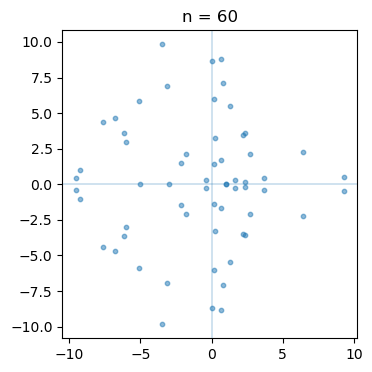

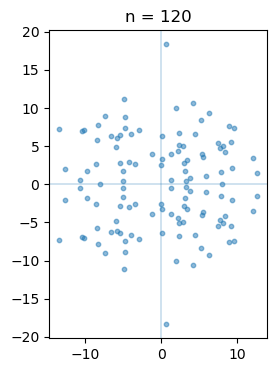

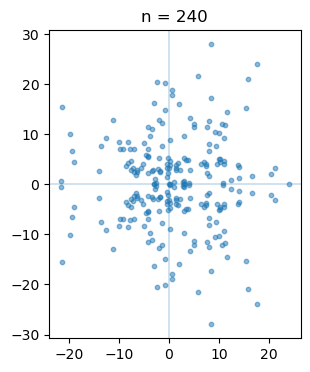

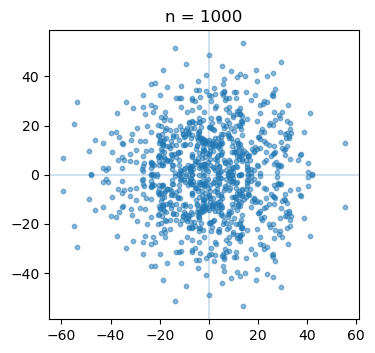

In [8]:
import numpy as np, matplotlib.pyplot as plt
from scipy.linalg import circulant

for n in [10, 30, 60,120,240,1000]:
    c = np.random.randint(-1, 2, size=n)
    eig = np.linalg.eigvals(circulant(c))
    plt.figure(figsize=(4,4))
    plt.scatter(eig.real, eig.imag, s=10, alpha=0.5)
    plt.axhline(0, lw=0.3); plt.axvline(0, lw=0.3)
    plt.gca().set_aspect('equal', 'box')
    plt.title(f"n = {n}")
    plt.show()


Amanda

**Generiranje naključnih cirkulantnih matrik**

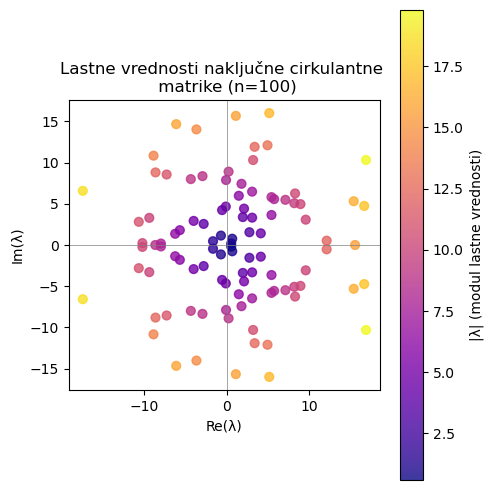

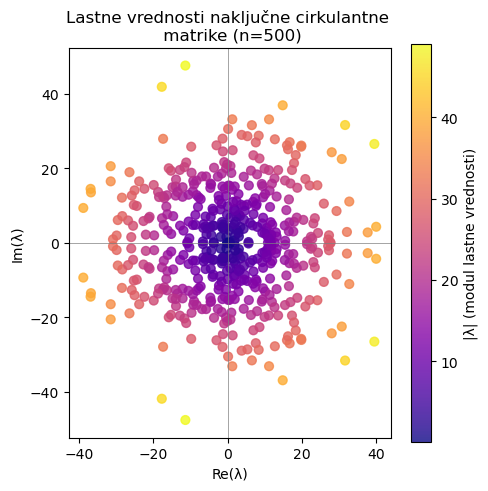

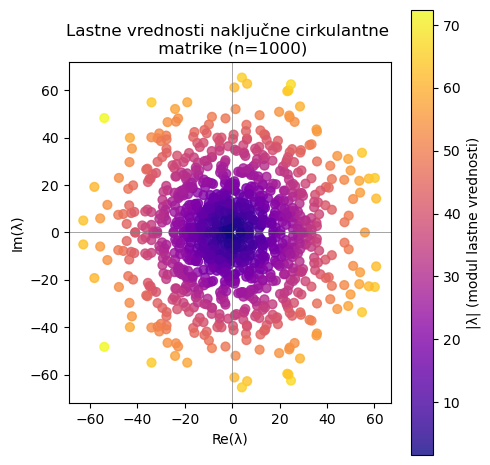

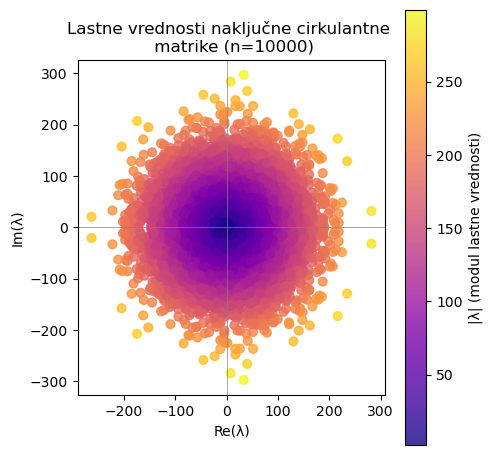

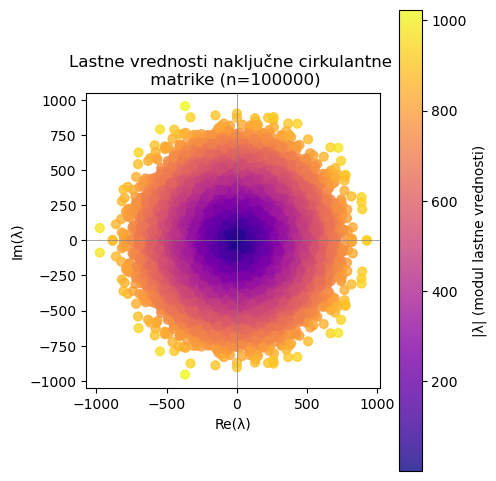

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def plot_random_circulant_eigs(n):
    c = np.random.randn(n)
    eigvals = fft(c)
    moduli = np.abs(eigvals)

    plt.figure(figsize=(5,5))
    scatter = plt.scatter(eigvals.real, eigvals.imag, 
                          c=moduli, cmap="plasma", s=40, alpha=0.8)
    plt.axhline(0, color="gray", lw=0.5)
    plt.axvline(0, color="gray", lw=0.5)
    plt.gca().set_aspect('equal', 'box')
    plt.colorbar(scatter, label="|λ| (modul lastne vrednosti)")
    plt.title(f"Lastne vrednosti naključne cirkulantne \n matrike (n={n})")
    plt.xlabel("Re(λ)")
    plt.ylabel("Im(λ)")
    plt.tight_layout()
    plt.show()

for n in [30, 100, 500, 1000, 10000, 50000, 100000]:
    plot_random_circulant_eigs(n)


Opazimo: 
1. Pri večjih dimenzijah naključnih cirkulantnih matrik se lastne vrednosti porazdelijo približno v krogu okoli izhodišča.
2. Pri realnih vektorjih c so lastne vrednosti simetrične glede na realno os. 

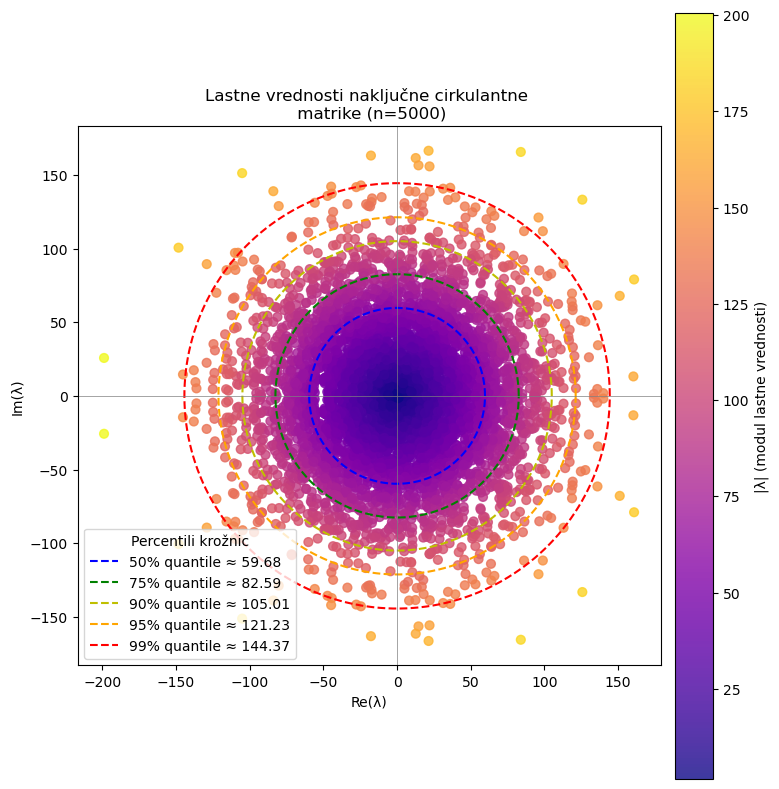

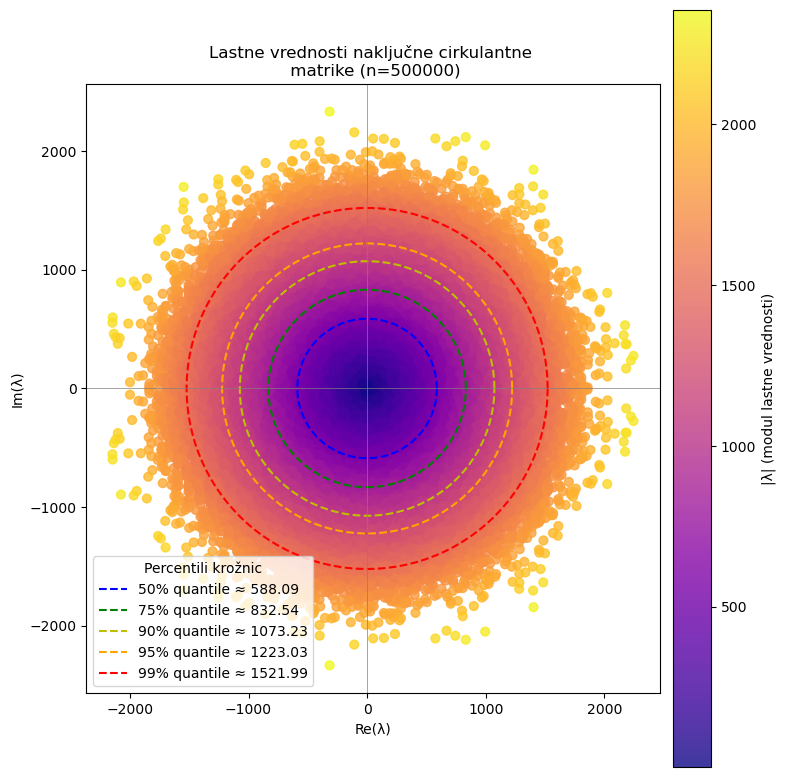

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def plot_circulant_percentile_legend_bottom_left(n, quantiles=[0.5,0.75,0.9,0.95,0.99]):
    c = np.random.randn(n)
    eigvals = fft(c)
    moduli = np.abs(eigvals)

    plt.figure(figsize=(8,8))
    sc = plt.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=40, alpha=0.8)
    
    theta = np.linspace(0, 2*np.pi, 400)
    colors = ['b','g','y','orange','r']

    for q, col in zip(quantiles, colors):
        r = np.quantile(moduli, q)
        plt.plot(r*np.cos(theta), r*np.sin(theta), color=col, linestyle='--', lw=1.5,
                 label=f'{int(q*100)}% quantile ≈ {r:.2f}')

    plt.axhline(0, color="gray", lw=0.5)
    plt.axvline(0, color="gray", lw=0.5)
    plt.gca().set_aspect('equal', 'box')

    # legenda za barve desno
    cbar = plt.colorbar(sc, pad=0.02)
    cbar.set_label("|λ| (modul lastne vrednosti)")

    # legenda za percentile krožnic spodaj levo
    plt.legend(loc='lower left', fontsize=10, title="Percentili krožnic")

    plt.title(f"Lastne vrednosti naključne cirkulantne \n matrike (n={n})")
    plt.xlabel("Re(λ)")
    plt.ylabel("Im(λ)")
    plt.tight_layout()
    plt.show()

for n in [1000, 5000, 10000, 500000]:
    plot_circulant_percentile_legend_bottom_left(n)


Ne vem, h kateri krožnici konvergirajo.

**Generiranje periodičnih cirkulantnih matrik**

n=30, max(|λ|)=12.75, min(|λ|)=0.78


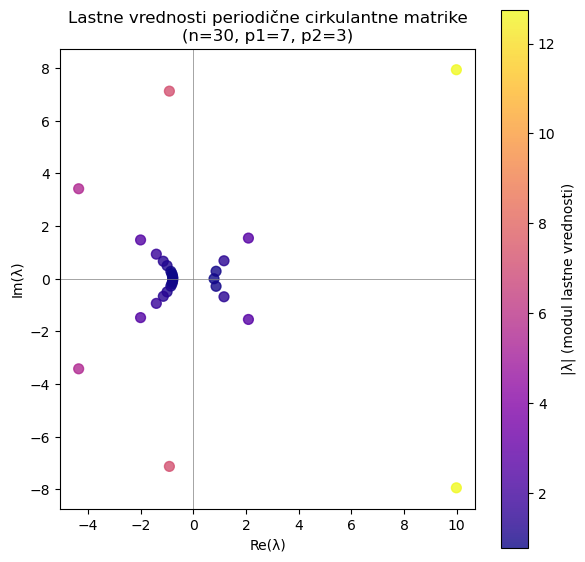

n=100, max(|λ|)=43.39, min(|λ|)=0.27


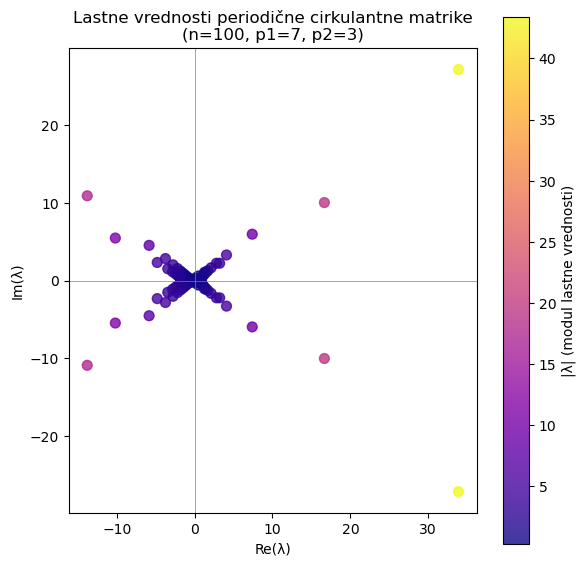

n=500, max(|λ|)=181.62, min(|λ|)=0.86


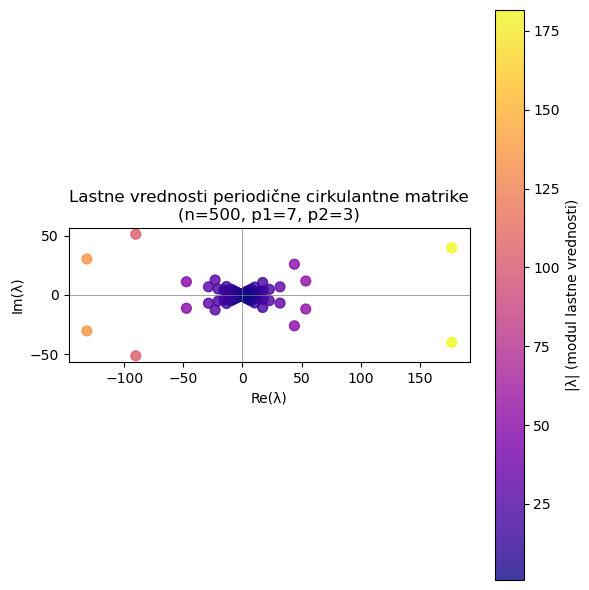

n=1000, max(|λ|)=483.43, min(|λ|)=0.57


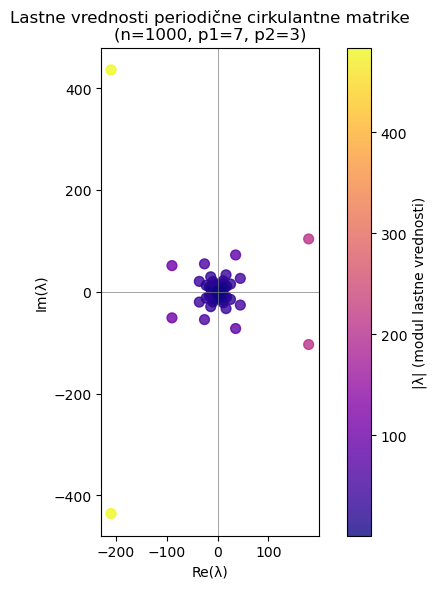

n=5000, max(|λ|)=2177.56, min(|λ|)=1.21


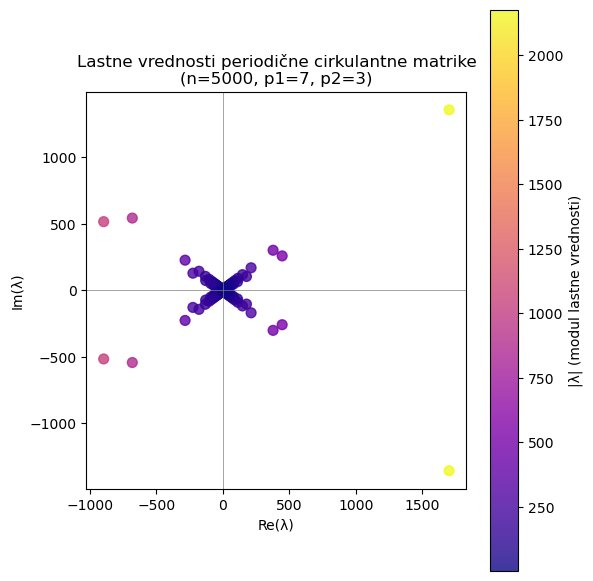

n=10000, max(|λ|)=3619.91, min(|λ|)=0.86


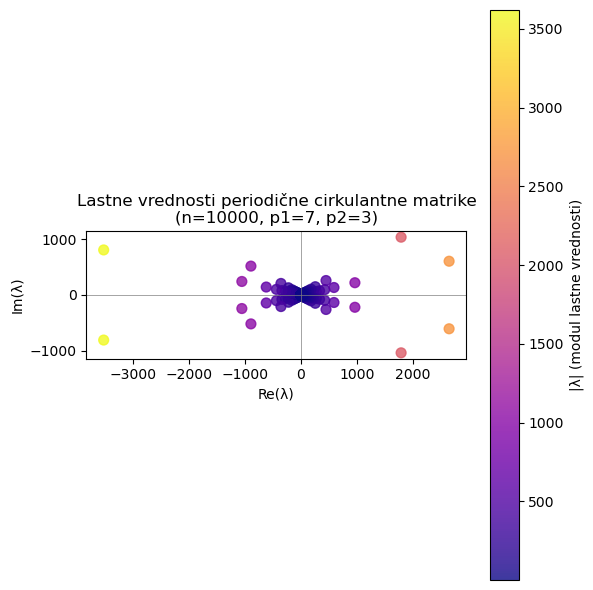

n=50000, max(|λ|)=24168.74, min(|λ|)=0.13


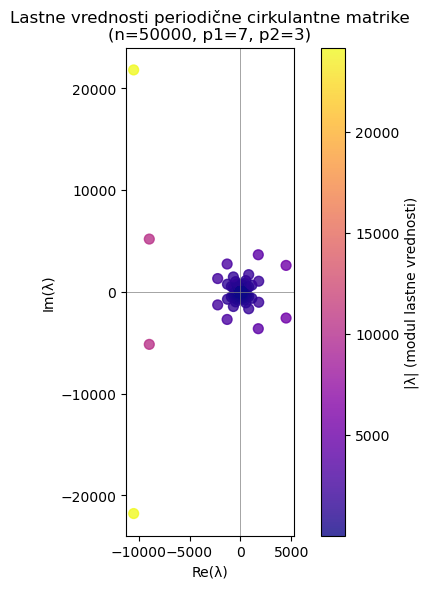

n=100000, max(|λ|)=43550.91, min(|λ|)=0.67


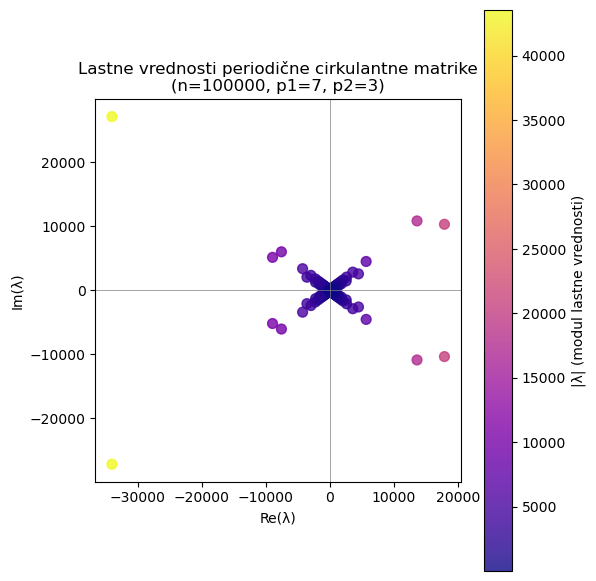

n=500000, max(|λ|)=181024.27, min(|λ|)=0.12


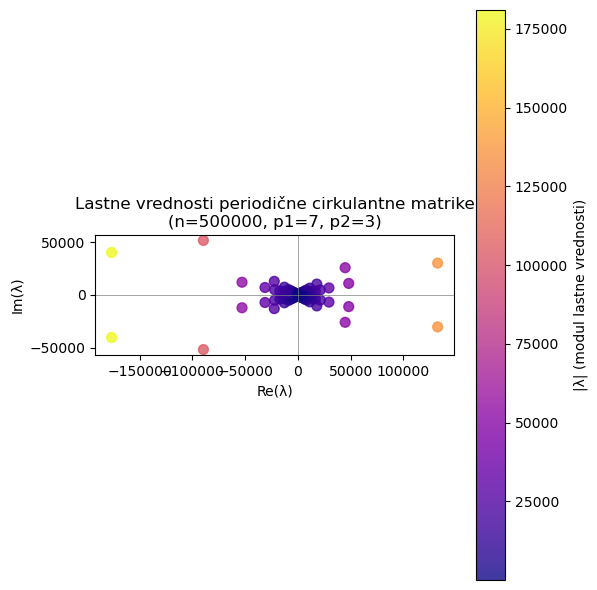

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def plot_circulant_periodic_visible(n, p1=7, p2=3):
    
    j = np.arange(n)
    c = np.sin(2 * np.pi * j / p1) + 0.5*np.sin(2 * np.pi * j / p2)
    
    eigvals = fft(c)
    moduli = np.abs(eigvals)

    print(f"n={n}, max(|λ|)={np.max(moduli):.2f}, min(|λ|)={np.min(moduli):.2f}")

    plt.figure(figsize=(6,6))
    scatter = plt.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=50, alpha=0.8)
    plt.axhline(0, color="gray", lw=0.5)
    plt.axvline(0, color="gray", lw=0.5)
    plt.gca().set_aspect('equal', 'box')
    plt.colorbar(scatter, label="|λ| (modul lastne vrednosti)")
    plt.title(f"Lastne vrednosti periodične cirkulantne matrike\n(n={n}, p1={p1}, p2={p2})")
    plt.xlabel("Re(λ)")
    plt.ylabel("Im(λ)")
    plt.tight_layout()
    plt.show()

for n in [30, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]:
    plot_circulant_periodic_visible(n)


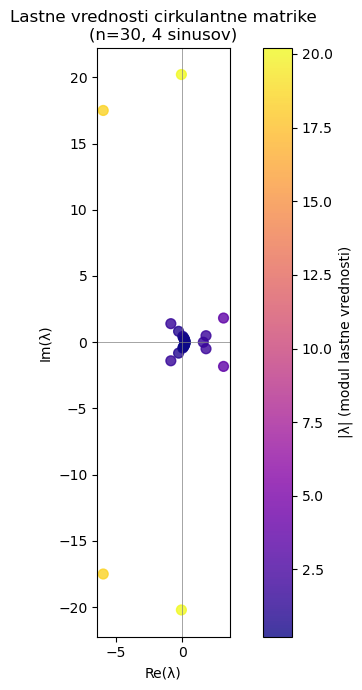

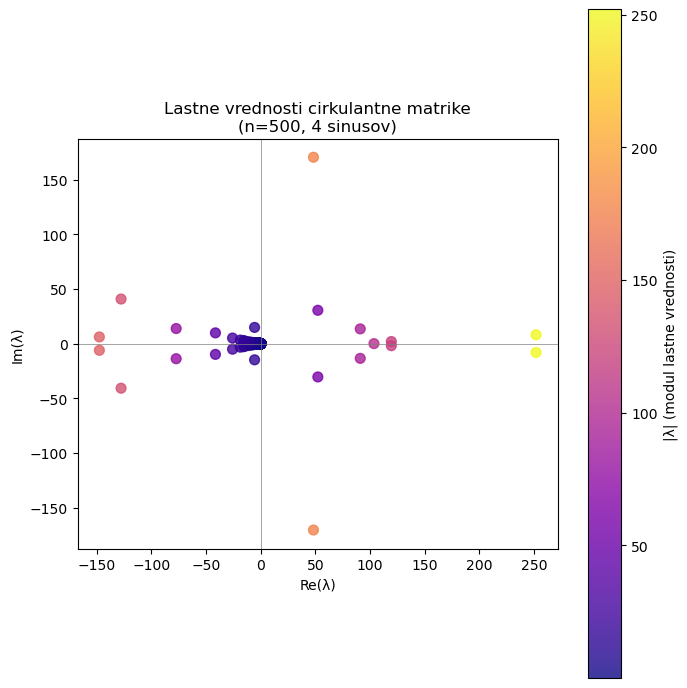

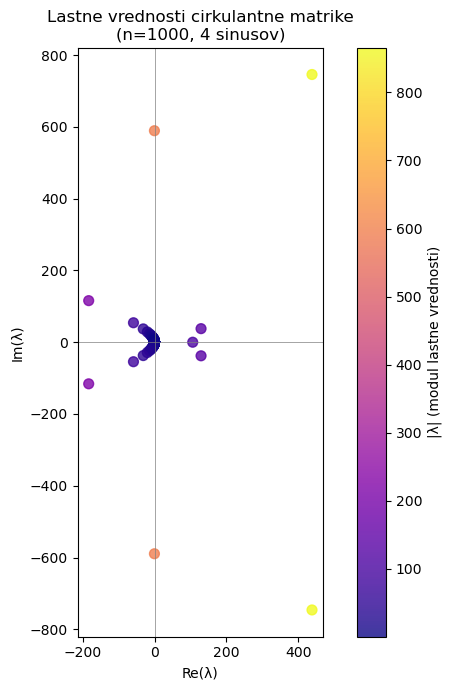

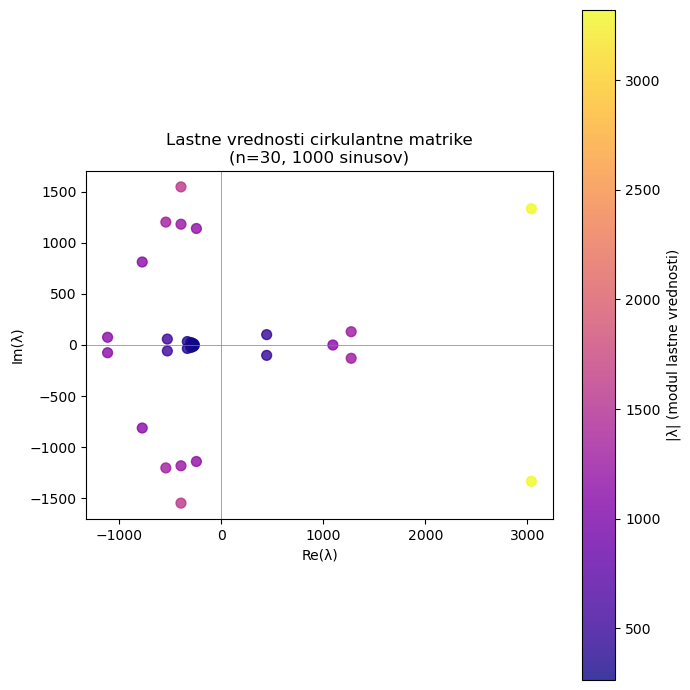

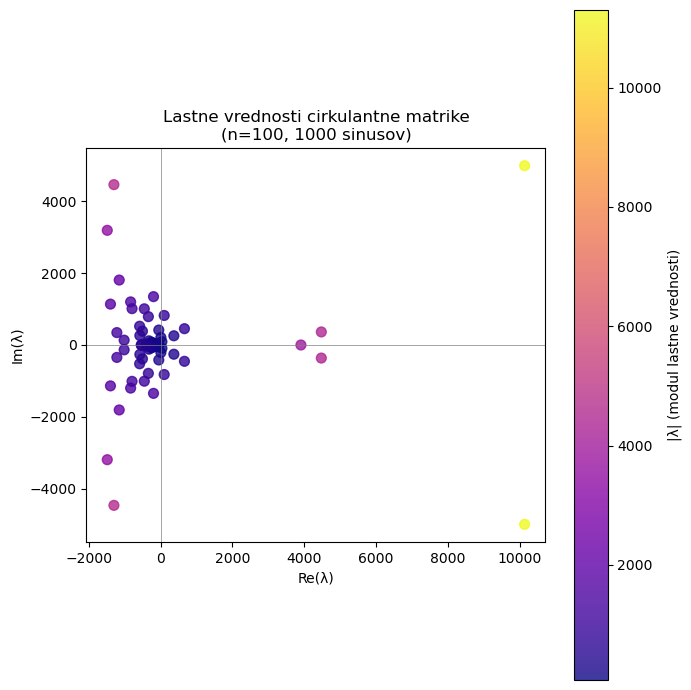

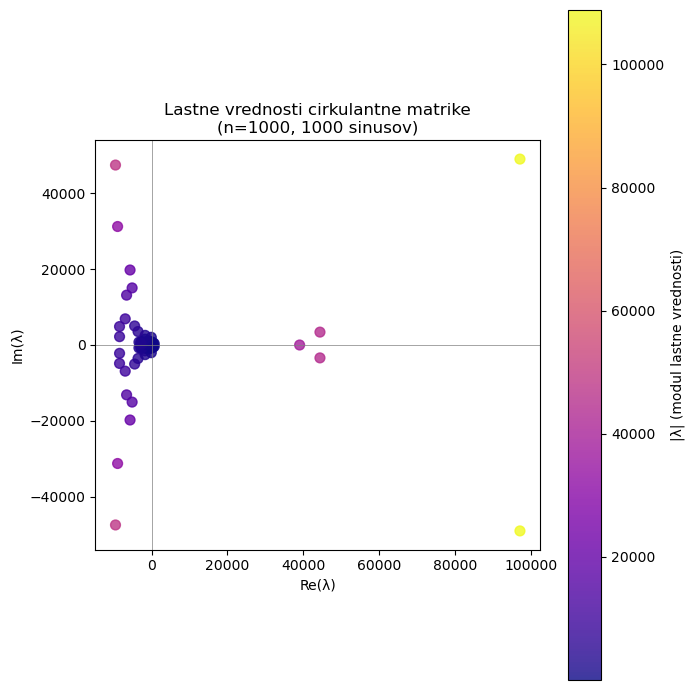

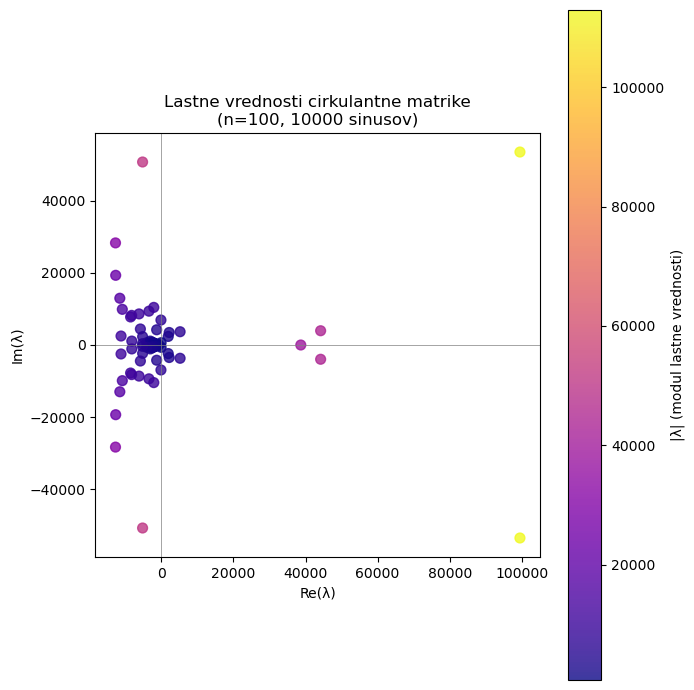

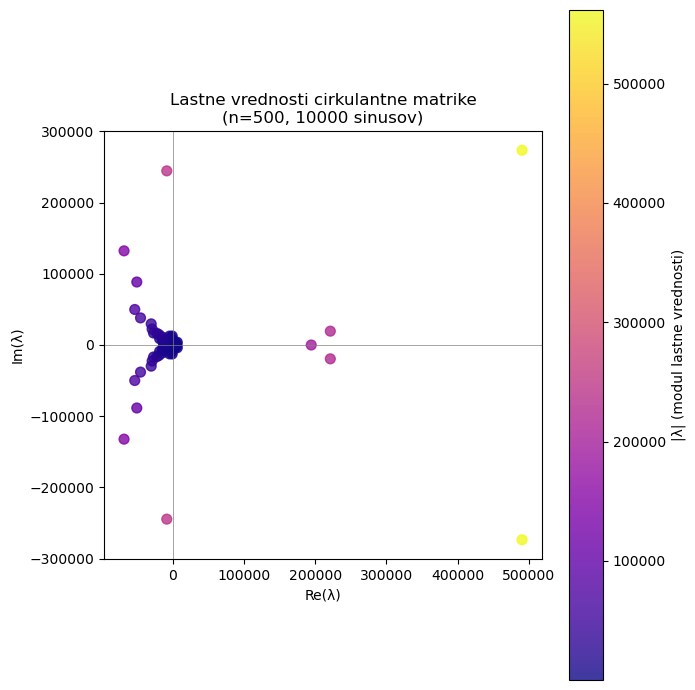

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def plot_circulant_multi_sine_simple(n, num_sines=3):
    """
    kombinacija sinusov
    
    """
    j = np.arange(n)
    c = np.zeros(n)
    
    rng = np.random.default_rng()
    for _ in range(num_sines):
        p = rng.integers(2, n//2)       # naključna perioda
        a = rng.uniform(0.5, 1.5)       # naključna amplituda
        c += a * np.sin(2*np.pi*j/p)
    
    eigvals = fft(c)
    moduli = np.abs(eigvals)
    
    plt.figure(figsize=(7,7))
    plt.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=50, alpha=0.8)
    plt.axhline(0, color="gray", lw=0.5)
    plt.axvline(0, color="gray", lw=0.5)
    plt.gca().set_aspect('equal', 'box')
    plt.colorbar(label="|λ| (modul lastne vrednosti)")
    plt.title(f"Lastne vrednosti cirkulantne matrike\n(n={n}, {num_sines} sinusov)")
    plt.xlabel("Re(λ)")
    plt.ylabel("Im(λ)")
    plt.tight_layout()
    plt.show()


for n in [30, 100, 500, 1000]:
    plot_circulant_multi_sine_simple(n, num_sines=4)

for n in [30, 100, 500, 1000]:
    plot_circulant_multi_sine_simple(n, num_sines=1000)

for n in [30, 100, 500, 1000]:
    plot_circulant_multi_sine_simple(n, num_sines=10000)    


Ugotovitve: Vrednosti matrike so [-1, 1]. Posledično so lastne vrednosti relativno "blizu" izhodišča. 


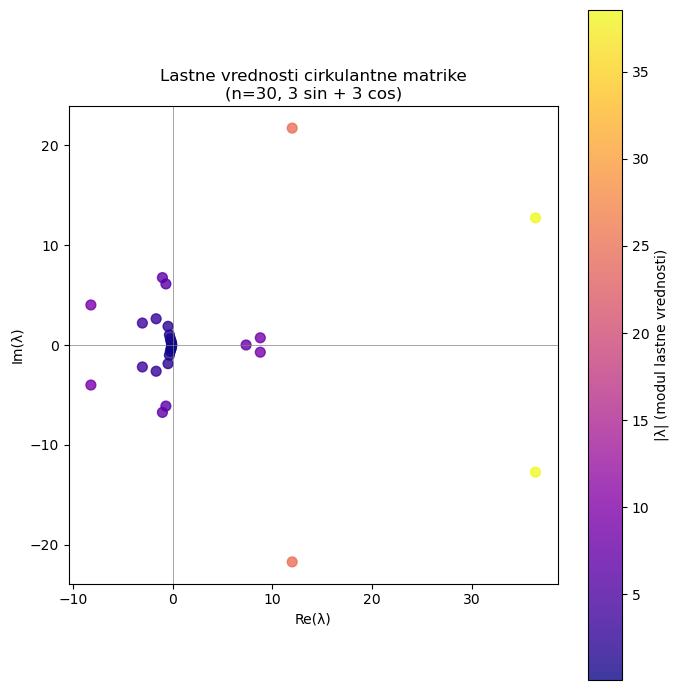

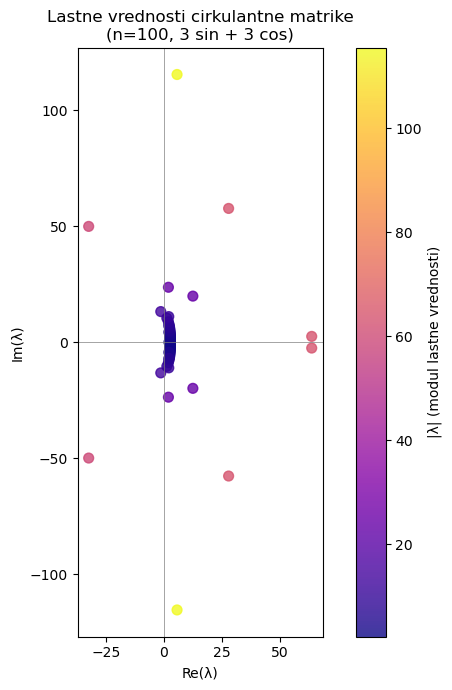

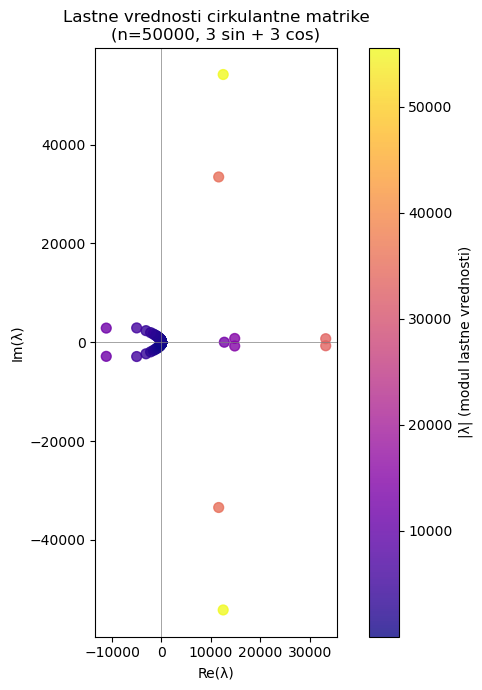

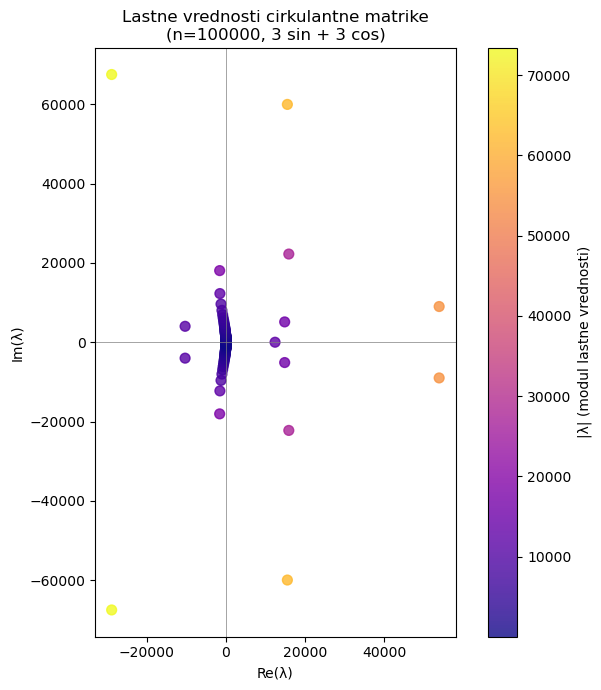

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def plot_circulant_sin_cos(n, num_sines=3, num_cosines=3):
    """
    kombinacija naključnih sinusov in kosinusov
    """
    j = np.arange(n)
    c = np.zeros(n)
    rng = np.random.default_rng()
    
    # naključni sinusi
    for _ in range(num_sines):
        p = rng.integers(2, n//2)
        a = rng.uniform(0.5, 1.5)
        c += a * np.sin(2 * np.pi * j / p)
    
    # naključni kosinusi
    for _ in range(num_cosines):
        p = rng.integers(2, n//2)
        a = rng.uniform(0.5, 1.5)
        c += a * np.cos(2 * np.pi * j / p)
    
    
    eigvals = fft(c)
    moduli = np.abs(eigvals)
    
    plt.figure(figsize=(7,7))
    plt.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=50, alpha=0.8)
    plt.axhline(0, color="gray", lw=0.5)
    plt.axvline(0, color="gray", lw=0.5)
    plt.gca().set_aspect('equal', 'box')
    plt.colorbar(label="|λ| (modul lastne vrednosti)")
    plt.title(f"Lastne vrednosti cirkulantne matrike\n(n={n}, {num_sines} sin + {num_cosines} cos)")
    plt.xlabel("Re(λ)")
    plt.ylabel("Im(λ)")
    plt.tight_layout()
    plt.show()

for n in [30, 100, 500, 1000, 50000, 100000, 500000]:
    plot_circulant_sin_cos(n, num_sines=3, num_cosines=3)


Opazimo obliko "hiperbol".

**Generiranje cirkulantnih matrik, kjer je prva vrstica kombinacija različnih funkcij**

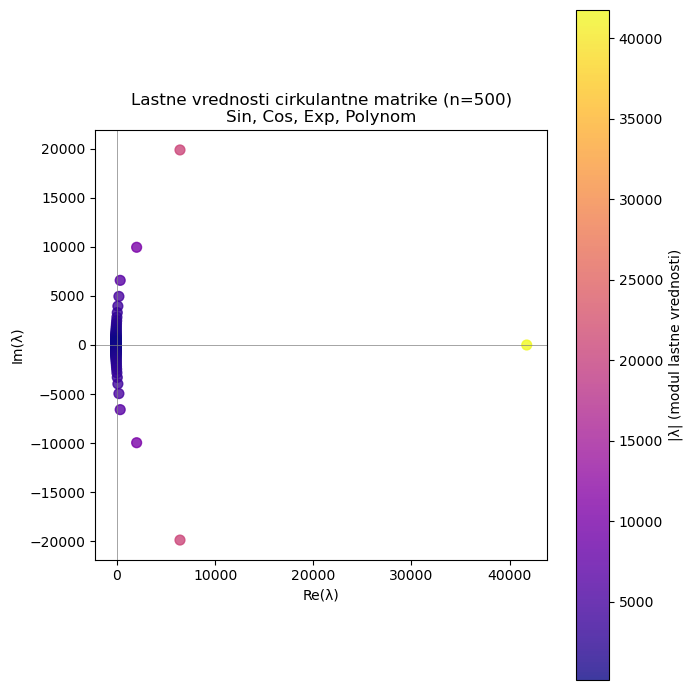

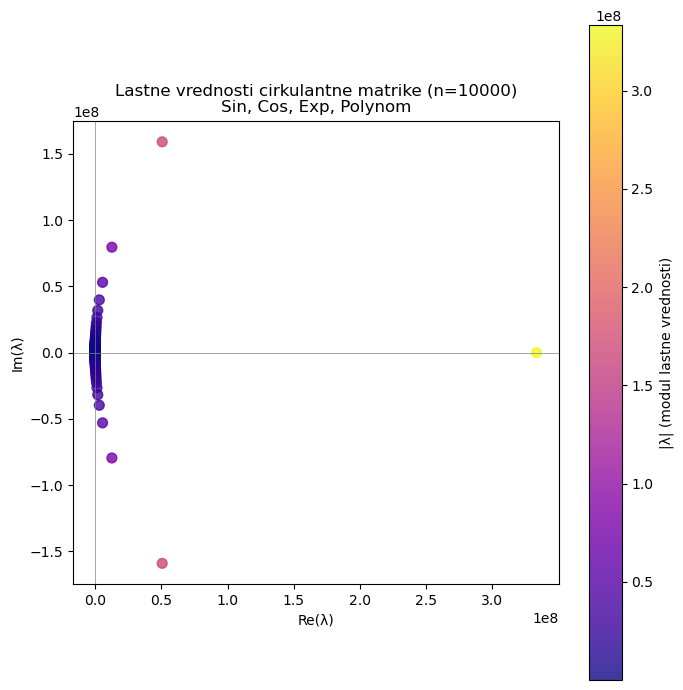

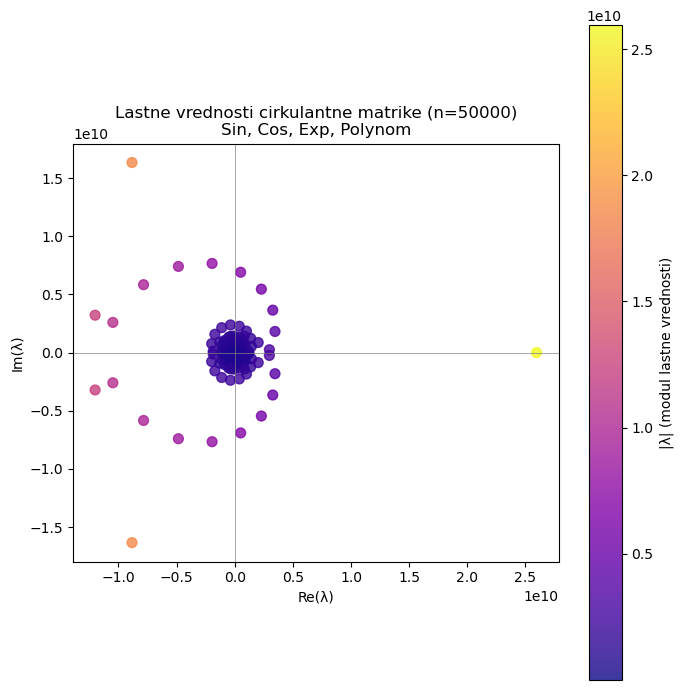

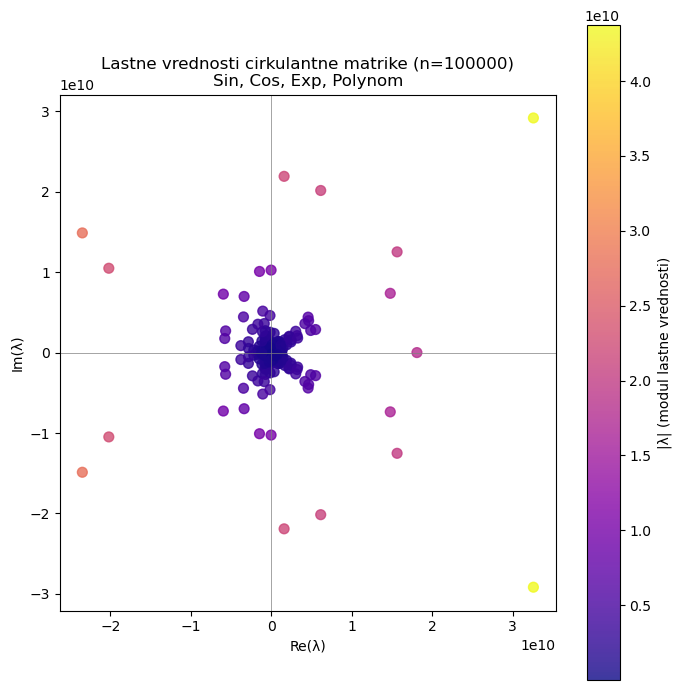

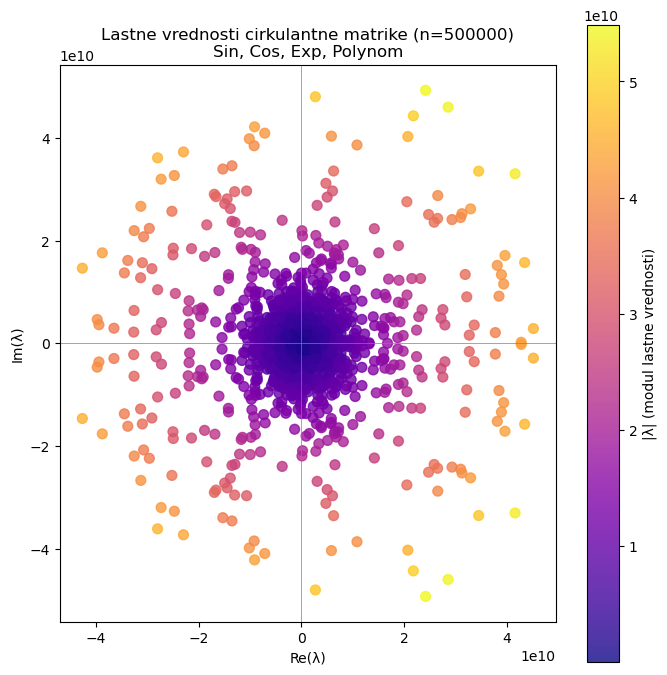

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def plot_circulant_mixed_functions(n):
    """
    kombinacija:
    - sinusov
    - kosinusov
    - eksponentnih členov
    - polinomskih členov
    """
    j = np.arange(n)
    c = np.zeros(n)
    rng = np.random.default_rng()
    
    # nekaj sinusov in kosinusov
    for _ in range(2):
        p = rng.integers(2, n//2)
        a = rng.uniform(0.5, 1.5)
        c += a * np.sin(2*np.pi*j/p) + a*0.5 * np.cos(2*np.pi*j/p)
    
    # eksponentni člen (modul < 1, da ne eksplodira)
    c += 0.5 * np.exp(-j / (0.2*n))
    
    # polinomski člen
    c += 0.001 * j**2  # majhen kvadratni člen
    
   
    
    eigvals = fft(c)
    moduli = np.abs(eigvals)
    
    plt.figure(figsize=(7,7))
    plt.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=50, alpha=0.8)
    plt.axhline(0, color="gray", lw=0.5)
    plt.axvline(0, color="gray", lw=0.5)
    plt.gca().set_aspect('equal', 'box')
    plt.colorbar(label="|λ| (modul lastne vrednosti)")
    plt.title(f"Lastne vrednosti cirkulantne matrike (n={n})\nSin, Cos, Exp, Polynom")
    plt.xlabel("Re(λ)")
    plt.ylabel("Im(λ)")
    plt.tight_layout()
    plt.show()

for n in [30, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]:
    plot_circulant_mixed_functions(n)


Opazimo nekaj zelo zanimivega. Pri majhnih n (30, 100, 500, 1000, 5000, 10000) so oblike podobne hiperbolam. Za večje n (50000, 100000, 500000) pa začnejo oblike spominjati na krog. PARSELOVA ENAČBA

**Generiranje parametričnih cirkulantnih matrik**

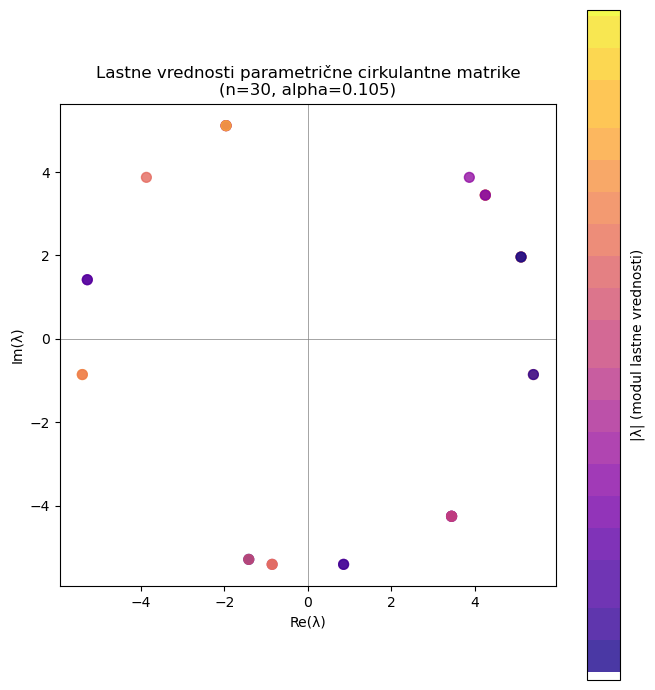

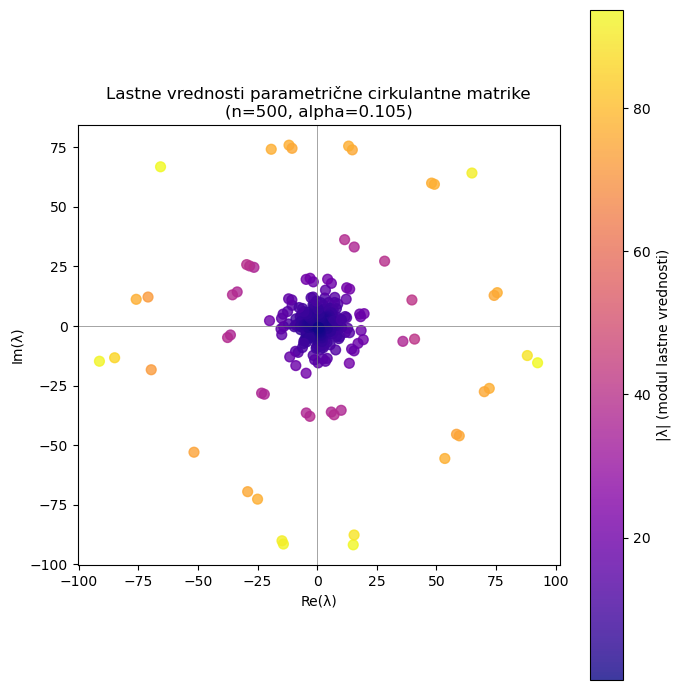

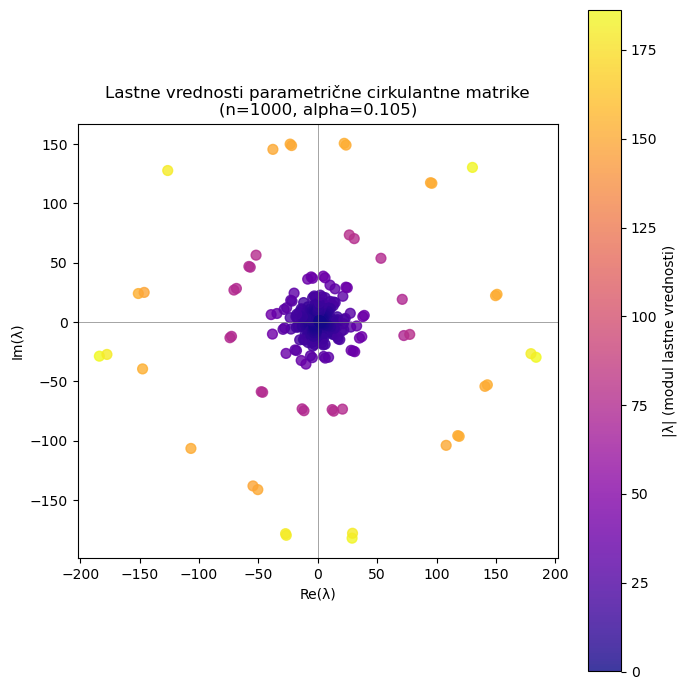

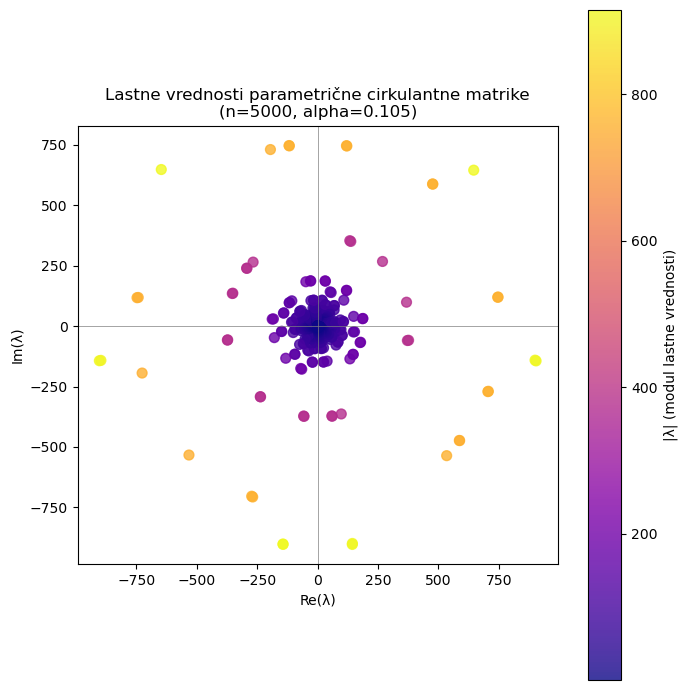

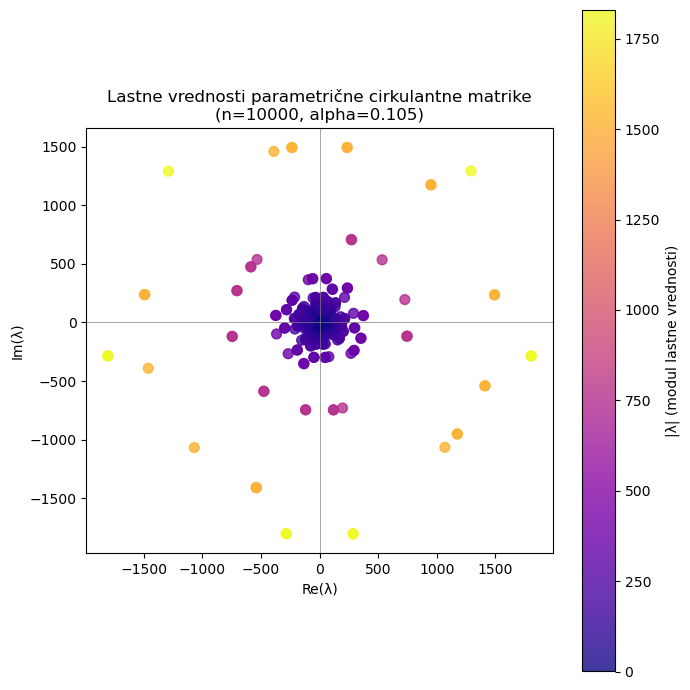

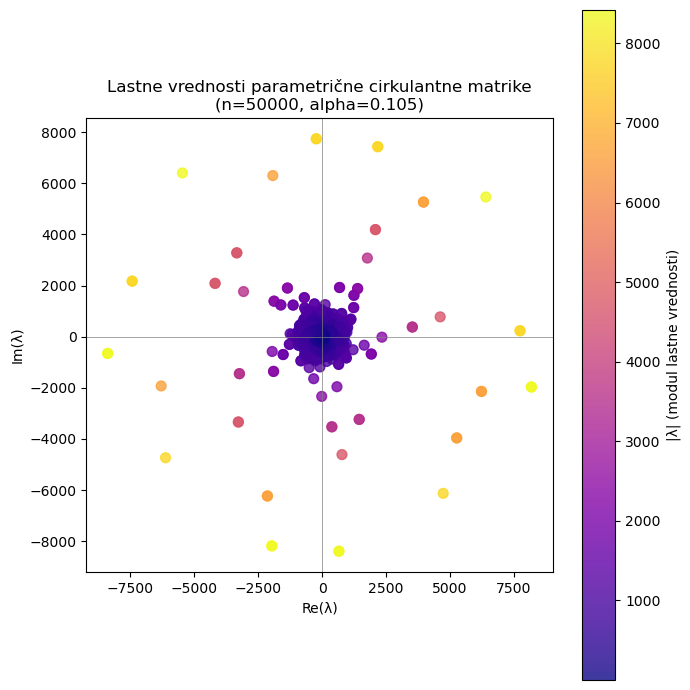

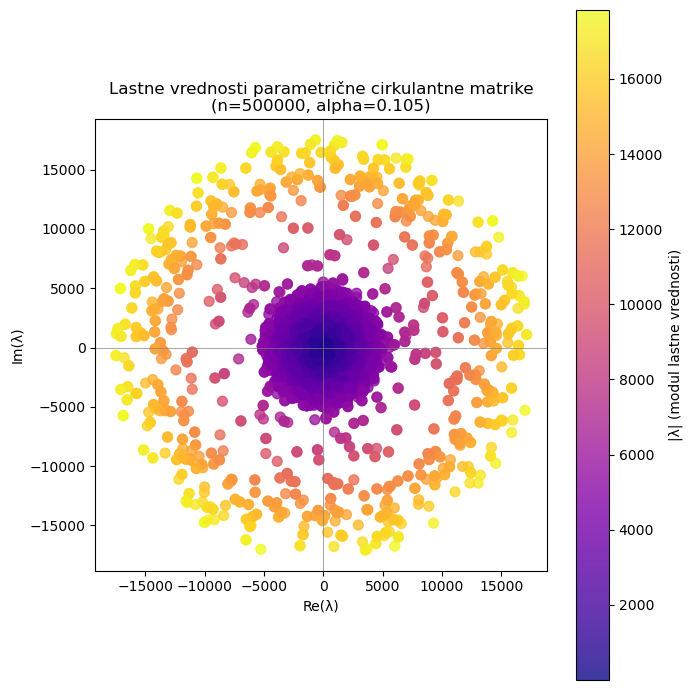

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def plot_parametric_circulant(n, alpha=np.pi/30):
    """
    Lastne vrednosti cirkulantne matrike s prvo vrstico
    c_j = exp(i * alpha * j^2)
    """
    j = np.arange(n)
    c = np.exp(1j * alpha * j**2)  # parametrična prva vrstica
    
    eigvals = fft(c)
    moduli = np.abs(eigvals)
    
    plt.figure(figsize=(7,7))
    scatter = plt.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=50, alpha=0.8)
    plt.axhline(0, color="gray", lw=0.5)
    plt.axvline(0, color="gray", lw=0.5)
    plt.gca().set_aspect('equal', 'box')
    plt.colorbar(scatter, label="|λ| (modul lastne vrednosti)")
    plt.title(f"Lastne vrednosti parametrične cirkulantne matrike\n(n={n}, alpha={alpha:.3f})")
    plt.xlabel("Re(λ)")
    plt.ylabel("Im(λ)")
    plt.tight_layout()
    plt.show()

for n in [30, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]:
    plot_parametric_circulant(n, alpha=np.pi/30)


Opazimo, da grafi tvorijo spirale.

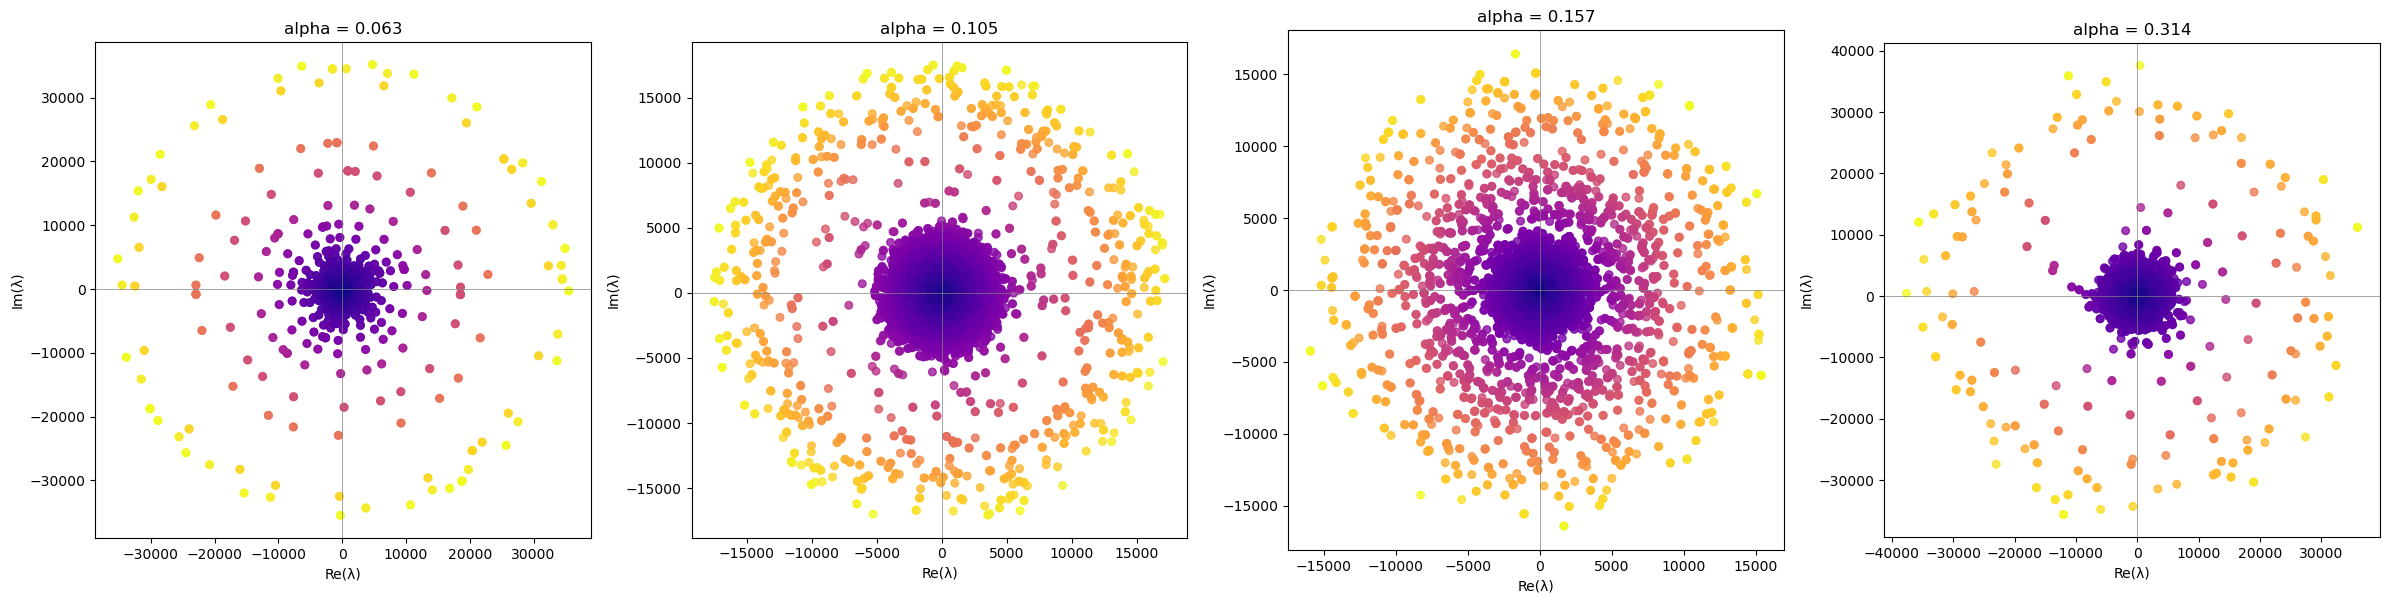

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def plot_parametric_circulant_multi_alpha(n, alphas):
    j = np.arange(n)
    
    plt.figure(figsize=(6*len(alphas),6))
    
    for idx, alpha in enumerate(alphas, 1):
        c = np.exp(1j * alpha * j**2)
        eigvals = fft(c)
        moduli = np.abs(eigvals)
        
        plt.subplot(1, len(alphas), idx)
        plt.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=30, alpha=0.8)
        plt.axhline(0, color="gray", lw=0.5)
        plt.axvline(0, color="gray", lw=0.5)
        plt.gca().set_aspect('equal', 'box')
        plt.title(f"alpha = {alpha:.3f}")
        plt.xlabel("Re(λ)")
        plt.ylabel("Im(λ)")
    
    plt.tight_layout()
    plt.show()

n = 500000
alphas = [np.pi/50, np.pi/30, np.pi/20, np.pi/10]
plot_parametric_circulant_multi_alpha(n, alphas)


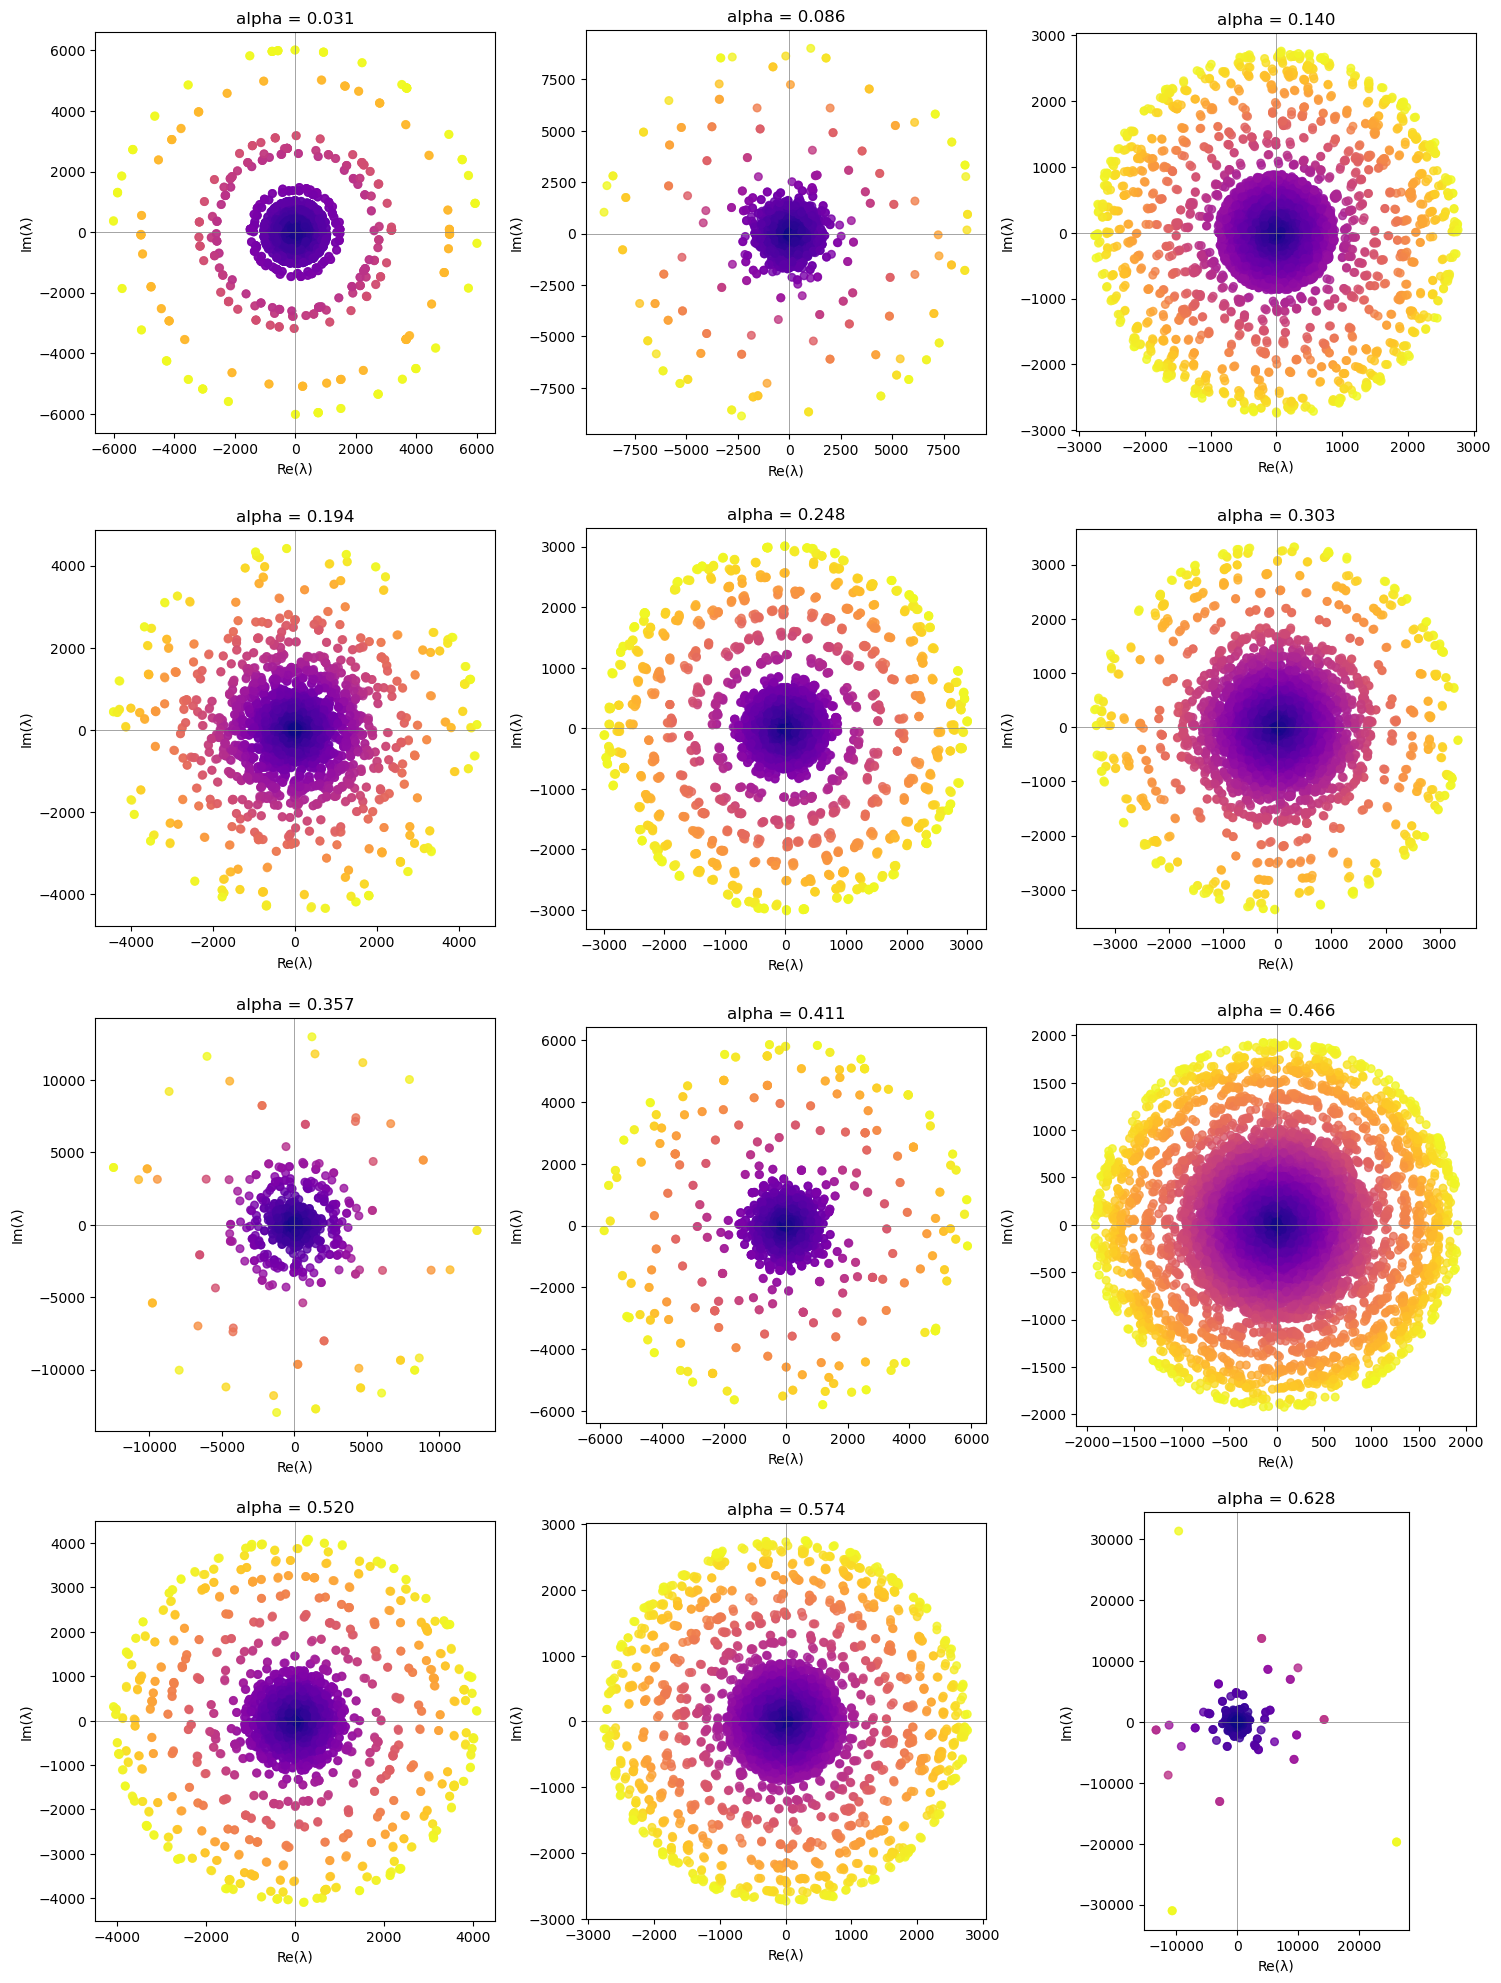

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def plot_parametric_circulant_grid(n, alphas, ncols=3):
    """
    Prikaže mrežo grafov lastnih vrednosti za različne alpha.
    
    n      : dimenzija matrike
    alphas : seznam alfa vrednosti
    ncols  : število grafov v vrstici
    """
    nplots = len(alphas)
    nrows = int(np.ceil(nplots / ncols))
    
    plt.figure(figsize=(5*ncols, 5*nrows))
    
    j = np.arange(n)
    
    for idx, alpha in enumerate(alphas, 1):
        c = np.exp(1j * alpha * j**2)
        eigvals = fft(c)
        moduli = np.abs(eigvals)
        
        plt.subplot(nrows, ncols, idx)
        plt.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=30, alpha=0.8)
        plt.axhline(0, color="gray", lw=0.5)
        plt.axvline(0, color="gray", lw=0.5)
        plt.gca().set_aspect('equal', 'box')
        plt.title(f"alpha = {alpha:.3f}")
        plt.xlabel("Re(λ)")
        plt.ylabel("Im(λ)")
    
    plt.tight_layout()
    plt.show()

n = 100000
alphas = np.linspace(np.pi/100, np.pi/5, 12)  
plot_parametric_circulant_grid(n, alphas, ncols=3)
